In [1]:
import time 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_memory(t):
    'Simulate a function that returns system memory'
    return 100 * (0.5 + 0.5 *np.sin(0.5 * np.pi * t))

In [3]:
def get_cpu(t):
    'Simulate a function that returns cpu usage'
    return 100 * (0.5 +0.5 * np.sin(0.2 * np.pi * (t - 0.25)))

In [5]:
def get_net(t):
    'Simulate a function that returns network bandwith'
    return 100 * (0.5 +0.5 * np.sin(0.7 * np.pi * (t - 0.1)))

In [6]:
def get_stats(t):
    return get_memory(t),get_cpu(t),get_net(t)

70.6 frames per second


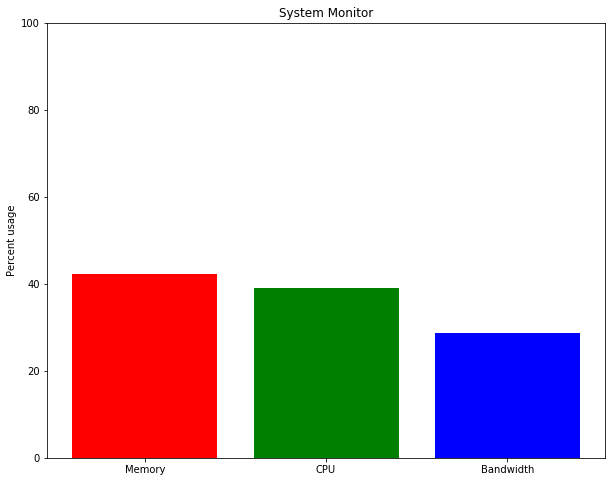

In [42]:
fig,ax = plt.subplots(figsize = (10,8)) # 加载子图
ind = np.arange(1,4)
pm,pc,pn = plt.bar(ind,get_stats(0))  # 横坐标需要给3个值才能有后续的编辑
pm.set_facecolor('r')  # 1.0这个位置改为红色
pc.set_facecolor('g')
pn.set_facecolor('b')
ax.set_xticks(ind)
ax.set_xticklabels(['Memory','CPU','Bandwidth'])  # 设置x的标签
ax.set_ylim([0,100]) # 设置y轴的值域
ax.set_ylabel('Percent usage') #设置y轴label
ax.set_title('System Monitor')
start = time.time()
for i in range(200):
    m,c,n = get_stats(i/10.0)
    pm.set_height(m)
    pc.set_height(c)
    pn.set_height(n)
    fig.canvas.draw_idle() #重新绘制整个图表
    try:
        fig.canvas.flush_events()  # Flush the GUI events for the figure.Interactive backends need to reimplement this method
    except NotImplementedError:
        pass
stop = time.time()
print ('{fps:.1f} frames per second'.format(fps=200/(stop-start)))